### Neural Network

Neural Network is the network of multiple neurons with multiple layers. A neuron is a small learning unit which uses some kind of activation function to learn the weights and biases and gain experience.

Steps to make and train a model: <br>
1. Preprocess data like removing the unwanted features which will eventually consume less computing power.<br>
2. Drop null values. <br>
3. Perform encoding on the categorical variables. <br>
4. Split the data using into 80% training and 20% testing data and select X and y.<br>
5. Train the model.<br>
6. Final output.<br>

**Neural Network Architecture**<br>

The neural network consists of 3 layers which has 2 hidden layers with first layer having 8 neurons, second layer with 6 neuron and output layer with 1 neuron. <br>

This is the binary classification problem in which the output tells that the customer has exited or not <br>

**Dataset used **: Churn modelling dataset by Kaggle.

In [1]:
import pandas as pd

In [2]:
# importing csv file 
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There are some irrelevant features like RowNumber, CustomerId, Surname. We need to drop these features to save the computing cycles.

In [4]:
# axis = 1 means applying the method vertically or columm-wise.
# By default, axis = 0 and method is applied horizontally or row-wise
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Applying One-Hot Encoding on the Geography and Gender feature

In [6]:
geography = pd.get_dummies(dataset["Geography"],drop_first=True)

In [7]:
gender = pd.get_dummies(dataset["Gender"],drop_first=True)

In [8]:
dataset = dataset.drop(['Geography','Gender'],axis=1)

In [9]:
dataset = pd.concat([dataset,geography,gender],axis=1)

In [10]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [11]:
y = dataset['Exited']

In [12]:
dataset = dataset.drop(['Exited'],axis=1)

In [13]:
X = dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Sequential** creates a neural network as a virtual box and layers are added to it.<br>
**Dense** is used to add layers.

In [16]:
from keras import Sequential

In [17]:
model = Sequential()

In [18]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
from keras.layers import Dense

model.add(Dense(input_dim = 11, units = 8, kernel_initializer = "zero", bias_initializer = "zero", activation = "relu" ))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 16        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(Dense(units=6,kernel_initializer = "zero", bias_initializer = "zero", activation = "relu" ))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(Dense(units=1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 234
Trainable params: 234
Non-trainable params: 0
__________________________________________________________

In [39]:
# It shows the detailed configuration of the model
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    '

In [40]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam())

In [41]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 0s 586us/step - loss: 0.6614
Epoch 2/10
250/250 [==============================] - 0s 580us/step - loss: 0.6092
Epoch 3/10
250/250 [==============================] - 0s 596us/step - loss: 0.5729
Epoch 4/10
250/250 [==============================] - 0s 629us/step - loss: 0.5484
Epoch 5/10
250/250 [==============================] - 0s 614us/step - loss: 0.5322
Epoch 6/10
250/250 [==============================] - 0s 579us/step - loss: 0.5219
Epoch 7/10
250/250 [==============================] - 0s 583us/step - loss: 0.5157
Epoch 8/10
250/250 [==============================] - 0s 570us/step - loss: 0.5120
Epoch 9/10
250/250 [==============================] - 0s 599us/step - loss: 0.5100
Epoch 10/10
250/250 [==============================] - 0s 577us/step - loss: 0.5089


In [42]:
import matplotlib 
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

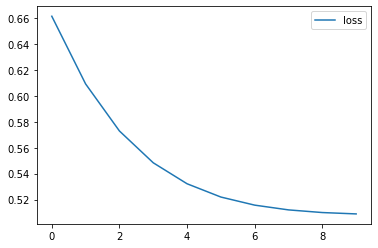

In [43]:
loss.plot()

In [44]:
y_hat = model.predict(X_test)

In [45]:
y_hat

array([[0.22004148],
       [0.22004148],
       [0.22004148],
       ...,
       [0.22004148],
       [0.22004148],
       [0.22004148]], dtype=float32)

In [46]:
y_hat

array([[0.22004148],
       [0.22004148],
       [0.22004148],
       ...,
       [0.22004148],
       [0.22004148],
       [0.22004148]], dtype=float32)